# **Bank Customer Churn Model**

---



## **Objective**

The objective of this project is to develop a predictive model that accurately identifies bank customers who are at risk of leaving the bank or have already left.

## **Data Source**

https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

## **Describe Data**

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Analyzing Data**

In [6]:
df.shape

(10000, 13)

In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df.set_index('CustomerId', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## **Data Preprocessing**

In [10]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(df[col].value_counts())

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [11]:
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace = True)

In [12]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace = True)

In [13]:
for col in df.columns:
  print(col, df[col].unique())

Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 61

In [14]:
for col in ['Has Credit Card', 'Is Active Member', 'Num Of Products']:
  print(f'{df[col].value_counts()}')

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64
Is Active Member
1    5151
0    4849
Name: count, dtype: int64
Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


In [15]:
df.replace({'Num Of Products': {1: 0, 2: 1, 3: 1, 4: 1}}, inplace = True)

In [16]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [17]:
df['Zero Bank Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

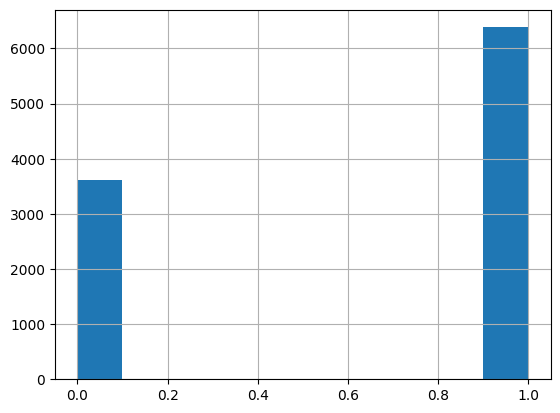

In [18]:
df['Zero Bank Balance'].hist()

In [19]:
df.groupby(['Churn', 'Geography', 'Zero Bank Balance']).count()

Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography Zero Bank Balance                                               
0     0         0                     1036         1036    1036  1036    1036   
                1                     1028         1028    1028  1028    1028   
      1         1                     1695         1695    1695  1695    1695   
      2         0                     2081         2081    2081  2081    2081   
                1                     2123         2123    2123  2123    2123   
1     0         0                      163          163     163   163     163   
                1                      250          250     250   250     250   
      1         1                      814          814     814   814     814   
      2         0                      337          337     337   337     337   
                1                      473          473     473   473     473   

                                   Balance  Num Of Products  Has Credit Card  \
Churn Geography Zero Bank Balance                                              
0     0         0                     1036             1036             1036   
                1                     1028             1028             1028   
      1         1                     1695             1695             1695   
      2         0                     2081             2081             2081   
                1                     2123             2123             2123   
1     0         0                      163              163              163   
                1                      250              250              250   
      1         1                      814              814              814   
      2         0                      337              337              337   
                1                      473              473              473   

                                   Is Active Member  Estimated Salary  
Churn Geography Zero Bank Balance                                      
0     0         0                              1036              1036  
                1                              1028              1028  
      1         1                              1695              1695  
      2         0                              2081              2081  
                1                              2123              2123  
1     0         0                               163               163  
                1                               250               250  
      1         1                               814               814  
      2         0                               337               337  
                1                               473               473

## **Define Target Variable (y) and Feature Variables (X)**

In [20]:
X = df.drop(['Churn', 'Surname'], axis =1)
y = df['Churn']
X.shape, y.shape

((10000, 11), (10000,))

## **Undersampling and Oversampling**

In [21]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

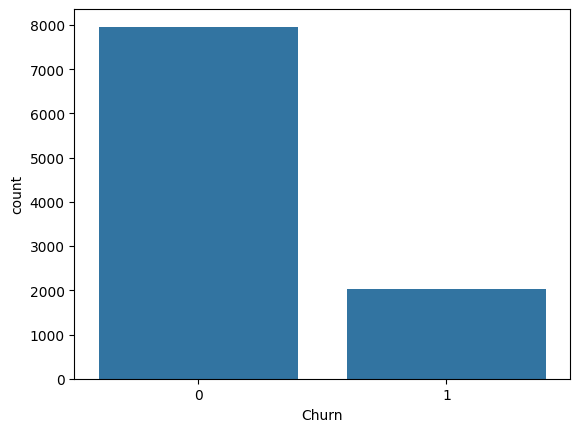

In [22]:
sns.countplot(x = 'Churn',data = df);

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=222529)
ros = RandomOverSampler(random_state=222529)

x_rus, y_rus = rus.fit_resample(X, y)
x_ros, y_ros = ros.fit_resample(X, y)

print('Original: ',X.shape, y.shape)
print('Random under Sampling: ',x_rus.shape, y_rus.shape)
print('Random Over Sampling: ',x_ros.shape, y_ros.shape)

print(y.value_counts())
print(y_rus.value_counts())
print(y_ros.value_counts())

Original:  (10000, 11) (10000,)
Random under Sampling:  (4074, 11) (4074,)
Random Over Sampling:  (15926, 11) (15926,)
Churn
0    7963
1    2037
Name: count, dtype: int64
Churn
0    2037
1    2037
Name: count, dtype: int64
Churn
1    7963
0    7963
Name: count, dtype: int64


## **Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=222529)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=222529)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3, random_state=222529)

In [25]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## **Modeling**

In [26]:
from sklearn.svm import SVC

svc = SVC()
svc_ros = SVC()
svc_rus = SVC()

svc.fit(X_train, y_train)
svc_ros.fit(X_train_ros, y_train_ros)
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [27]:
y_pred = svc.predict(X_test)
y_pred_ros = svc_ros.predict(X_test_ros)
y_pred_rus = svc_rus.predict(X_test_rus)

In [28]:
from sklearn.metrics import classification_report
print('Raw', classification_report(y_test, y_pred))
print('RUS', classification_report(y_test_rus, y_pred_rus))
print('ROS', classification_report(y_test_ros, y_pred_ros))


Raw               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2409
           1       0.76      0.29      0.42       591

    accuracy                           0.84      3000
   macro avg       0.80      0.63      0.66      3000
weighted avg       0.83      0.84      0.81      3000

RUS               precision    recall  f1-score   support

           0       0.71      0.74      0.73       613
           1       0.73      0.70      0.71       610

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223

ROS               precision    recall  f1-score   support

           0       0.76      0.77      0.77      2381
           1       0.77      0.76      0.76      2397

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



# **Hyperparameter Tuning**

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'C': [0.1, 1, 10, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

In [31]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [32]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [33]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2409
           1       0.45      0.48      0.46       591

    accuracy                           0.78      3000
   macro avg       0.66      0.67      0.66      3000
weighted avg       0.79      0.78      0.78      3000



In [34]:
grid_rus = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [35]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [36]:
grid_pred_rus = grid_rus.predict(X_test_rus)
print(classification_report(y_test_rus, grid_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       613
           1       0.73      0.71      0.72       610

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [37]:
grid_ros = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [38]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [39]:
grid_pred_ros = grid_ros.predict(X_test_ros)
print(classification_report(y_test_ros, grid_pred_ros))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2381
           1       0.87      0.95      0.91      2397

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



## **Model Evaluation**

In [40]:
print(classification_report(y_test_ros, grid_pred_ros))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2381
           1       0.87      0.95      0.91      2397

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



## **Prediction**

In [41]:
result = pd.DataFrame({'Actual': y_test_ros, 'Predicted': grid_pred_ros})
result

,Actual,Predicted
4493,0,0
14004,1,1
9882,1,1
849,0,0
13335,1,1
...,...,...
1274,0,0
15104,1,1
4655,0,1
3499,0,0


## **Explanation**

#####Created a Bank Customer Churn Model using Support Vector Classifier.

#####Encoded Catregorical data.
#####Standardization of specific features using standard scaler.
#####Used random undersampling and random oversampling.
#####Used GridSearchCV for hyperparameter tuning for best model prediction.